In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

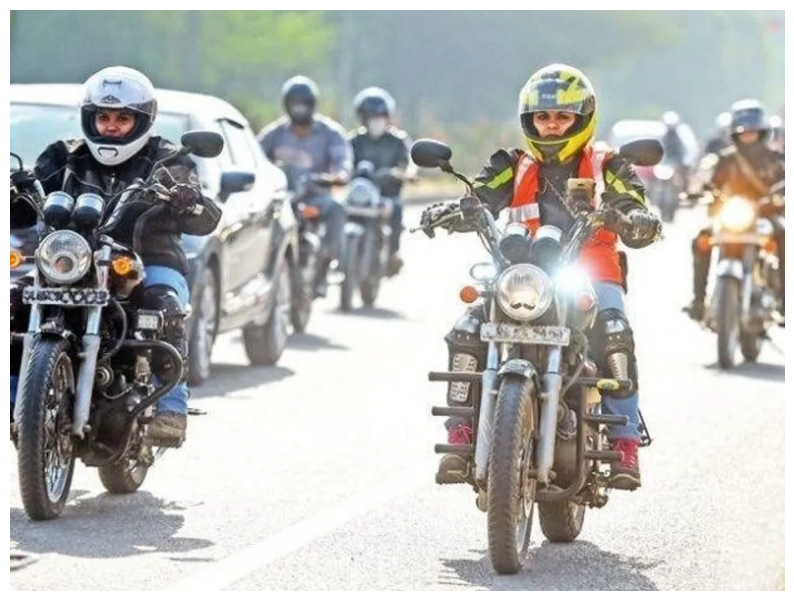

In [12]:
img0 = "pic_detection/1566227587-Bike_Traffic_Indiatimes.jpg"
_ = plt.figure(figsize = (10, 10))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img0))

In [3]:
# for person on bike
wts0_path = 'person-on-motorbike/yolov3-obj_final.weights'
cfgn0_path = 'person-on-motorbike/yolov3_pb.cfg'

p_min = 0.5
threshold = 0.3

In [4]:
net0 = cv2.dnn.readNetFromDarknet(cfgn0_path, wts0_path)
ln0_all = list(net0.getLayerNames())
ln0_output = [ln0_all[lyr-1] for lyr in net0.getUnconnectedOutLayers()]
labels0 = open('person-on-motorbike/coco.names').read().strip().split('\n')
print(labels0)

['person_bike']


In [5]:
wts1_path = 'helmet-detection/yolov3-helmet.weights'
cfgn1_path = 'helmet-detection/yolov3-helmet.cfg'

In [6]:
net1 = cv2.dnn.readNetFromDarknet(cfgn1_path, wts1_path)
ln1_all = net1.getLayerNames()
ln1_output = [ln1_all[lyr-1] for lyr in net1.getUnconnectedOutLayers()]
labels1 = open('helmet-detection/helmet.names').read().strip().split('\n')
print(labels1)

['Helmet']


In [7]:
image_input = cv2.imread(img0)
blob = cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB=True,crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
net0.setInput(blob)
net1.setInput(blob)
output_from_net0 = net0.forward(ln0_output)
output_from_net1 = net1.forward(ln1_output)

clr0 =[[102,220,225]]
clr1 =[[179,61,234]]

In [8]:
bb0 = []
conf0 = []
c_no_0 = []

bb1 = []
conf1 = []
c_no_1 = []

h,w = image_input.shape[:2]

#For Person on Bike
for result in output_from_net0:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>p_min:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))

            bb0.append([x_min,y_min,int(box_width),int(box_height)])
            conf0.append(float(confidence_current))
            c_no_0.append(class_current)

#For Helmet
for result in output_from_net1:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>p_min:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))

            bb1.append([x_min,y_min,int(box_width),int(box_height)])
            conf1.append(float(confidence_current))
            c_no_1.append(class_current)

In [9]:
results1 = cv2.dnn.NMSBoxes(bb1,conf1,p_min,threshold)

if len(results1) > 0:
    for i in results1.flatten():
            x_min,y_min=bb1[i][0],bb1[i][1]
            box_width,box_height= bb1[i][2],bb1[i][3]
            colour_box_current=[int(j) for j in clr1[c_no_1[i]]]
            cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
            text_box_current1='{}: {:.4f}'.format(labels1[int(c_no_1[i])],conf1[i])
            cv2.putText(image_input,text_box_current1,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

In [10]:
results0 = cv2.dnn.NMSBoxes(bb0,conf0,p_min,threshold)

if len(results0) > 0:
    for i in results0.flatten():
            x_min,y_min=bb0[i][0],bb0[i][1]
            box_width,box_height= bb0[i][2],bb0[i][3]
            colour_box_current=[int(j) for j in clr0[c_no_0[i]]]
            cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
            text_box_current0='{}: {:.4f}'.format(labels0[int(c_no_0[i])],conf0[i])
            cv2.putText(image_input,text_box_current0,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

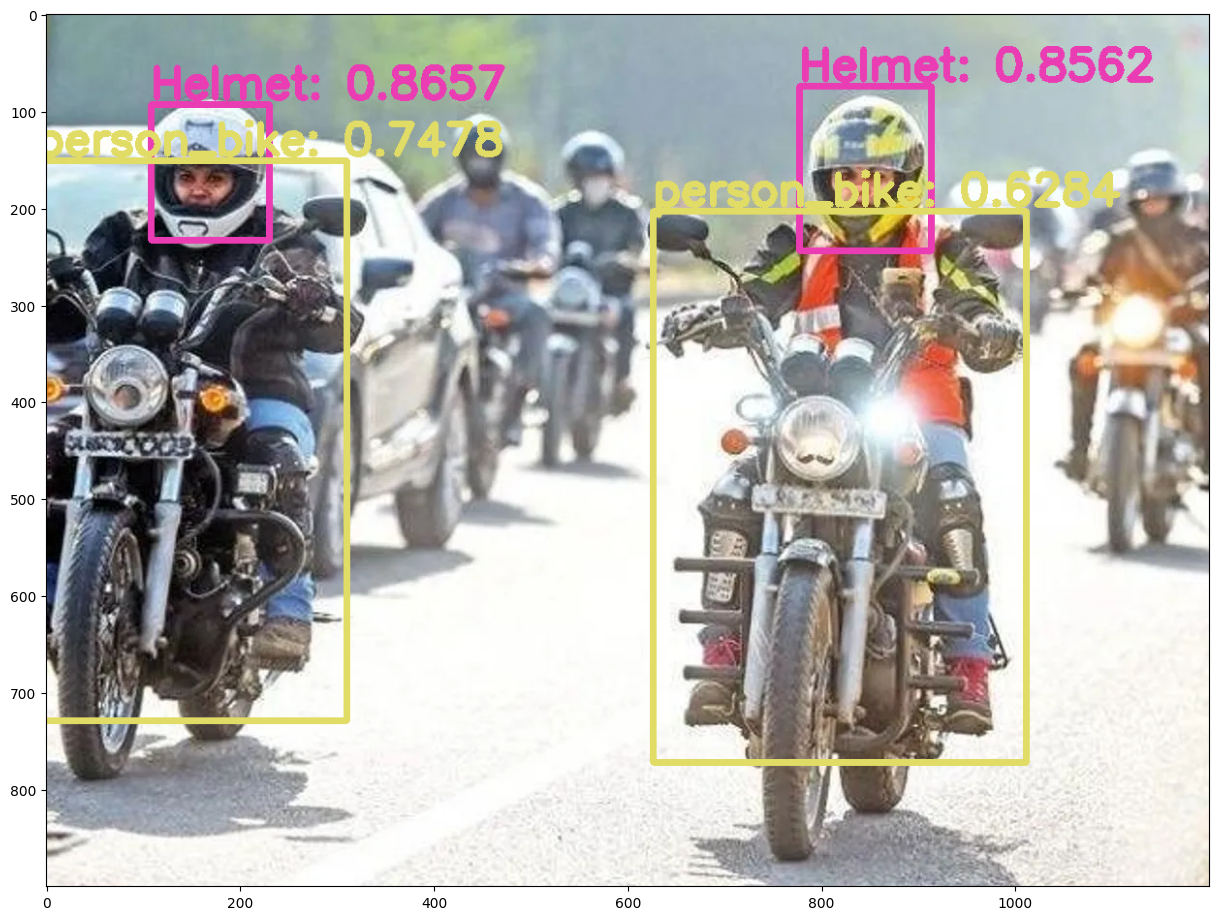

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0,15.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()